# 주성분 분석
주성분 분석은 직교 변환을 사용하여 상관관계를 가지는 관측값 변수들의 집합을 주성분이라고 하는 선형 상관관계를 가지지 않는 변수, 즉 주성분의 집합으로 바꾸는 통계적 절차다. 주성분의 수는 원래 변수의 수와 같거나 적다. 변환은 첫 번째 주성분이 가장 큰 분산을 가지고 그 다음 성분이 이전의 주성분과 직교한다는 제약 조건 하에 가장 큰 분산을 가지도록 정의 한다.

In [6]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime as dt
from sklearn.decomposition import KernelPCA
import pandas as pd
import urllib.parse
import datetime

In [105]:
a = dt.datetime(2010, 1, 1)
b = dt.datetime(2015, 1, 1)

In [106]:
symbols = ['ADS.DE','ALV.DE','BAS.DE','BAYN.DE','BEI.DE',
          'BMW.DE','CBK.DE','CON.DE','DAI.DE','DB1.DE',
          'DBK.DE','DPW.DE','DTE.DE','EOAN.DE','FME.DE',
          'FRE.DE','HEI.DE','HEN3.DE','IFX.DE','LHA.DE',
          'LIN.DE','LXS.DE','MRK.DE','MUV2.DE','RWE.DE',
          'SAP.DE','SDF.DE','SIE.DE','TKA.DE','VOW3.DE',
          '^GDAXI']

In [122]:
%%time
data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, 'yahoo')['Close']
data = data.dropna()
data.head()

Wall time: 32.6 s


,ADS.DE,ALV.DE,BAS.DE,BAYN.DE,BEI.DE,BMW.DE,CBK.DE,CON.DE,DAI.DE,DB1.DE,...,LXS.DE,MRK.DE,MUV2.DE,RWE.DE,SAP.DE,SDF.DE,SIE.DE,TKA.DE,VOW3.DE,^GDAXI
Date,,,,,,,,,,,,,,,,,,,,,
2015-05-05,73.879997,150.550003,85.930000,124.439003,76.669998,106.500000,11.845,207.600006,85.250000,73.419998,...,48.735001,96.290001,172.100006,22.080000,66.750000,29.980000,96.239998,24.155001,228.500000,11327.679688
2015-05-06,73.309998,154.199997,86.349998,124.931000,76.809998,104.099998,11.860,206.649994,84.669998,73.519997,...,48.625000,96.849998,173.350006,22.334999,66.290001,29.969999,96.849998,24.094999,220.800003,11350.150391
2015-05-07,73.209999,147.649994,86.129997,125.374001,79.260002,104.599998,12.265,210.699997,85.250000,74.230003,...,49.564999,97.239998,173.350006,22.410000,67.180000,29.969999,95.360001,24.219999,225.000000,11407.969727
2015-05-08,73.739998,151.000000,88.349998,130.639008,81.660004,109.500000,12.325,217.500000,88.070000,75.500000,...,51.570000,100.250000,174.600006,23.295000,67.919998,31.379999,97.110001,24.840000,232.000000,11709.730469
2015-05-11,74.019997,149.350006,87.540001,130.294006,80.769997,109.300003,12.390,214.699997,88.059998,76.250000,...,51.669998,99.529999,173.649994,23.254999,67.989998,31.969999,96.750000,24.865000,227.300003,11673.349609


In [123]:
dax=pd.DataFrame(data.pop('^GDAXI'))

In [124]:
data[data.columns[:6]].head()

,ADS.DE,ALV.DE,BAS.DE,BAYN.DE,BEI.DE,BMW.DE
Date,,,,,,
2015-05-05,73.879997,150.550003,85.930000,124.439003,76.669998,106.500000
2015-05-06,73.309998,154.199997,86.349998,124.931000,76.809998,104.099998
2015-05-07,73.209999,147.649994,86.129997,125.374001,79.260002,104.599998
2015-05-08,73.739998,151.000000,88.349998,130.639008,81.660004,109.500000
2015-05-11,74.019997,149.350006,87.540001,130.294006,80.769997,109.300003


## 주성분 분석 적용
주성분 분석은 정규화된 자료를 다루므로 각 자료를 정규화 시키는 함수를 설정한다.

In [125]:
scale_function = lambda x: (x - x.mean()) / x.std()

In [126]:
# 주성분 개수에 제한을 두지 않은 채 주성분 분석 고려.
pca = KernelPCA().fit(data.apply(scale_function))

In [127]:
len(pca.lambdas_)

641

In [128]:
# 10개의 성분 값만 살펴보기
pca.lambdas_[:10].round()

array([17706.,  9954.,  3394.,  2591.,   943.,   666.,   439.,   379.,
         342.,   304.])

In [129]:
# 상대적인 중요도 살피기
get_we = lambda x: x / x.sum()
get_we(pca.lambdas_)[:10]

array([0.46766077, 0.26291632, 0.08963891, 0.06842447, 0.02489888,
       0.01758017, 0.01160136, 0.01002328, 0.00903217, 0.00801678])

In [130]:
get_we(pca.lambdas_)[:5].sum()

0.9135393598164474

## 주성분 지수 구성

In [131]:
# 하나의 성분만을 가지는 주성분 지수
pca = KernelPCA(n_components=1).fit(data.apply(scale_function))
dax['PCA_1'] = pca.transform(-data)

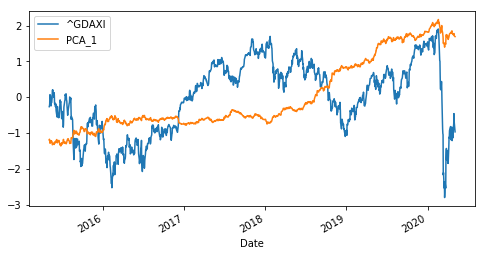

In [132]:
import matplotlib.pyplot as plt
%matplotlib inline
dax.apply(scale_function).plot(figsize=(8,4))

In [133]:
# 주성분 개수를 증가시켜보기
pca = KernelPCA(n_components=1).fit(data.apply(scale_function))
pca_components = pca.transform(data)
weights = get_we(pca.lambdas_)
dax['PCA_5'] = np.dot(pca_components, weights)

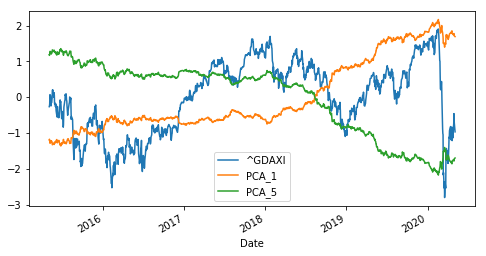

In [134]:
import matplotlib.pyplot as plt
%matplotlib inline
dax.apply(scale_function).plot(figsize=(8,4))

In [135]:
import matplotlib as mpl
mpl_dates = mpl.dates.date2num(data.index)
mpl_dates

array([735723., 735724., 735725., ..., 737544., 737545., 737549.])

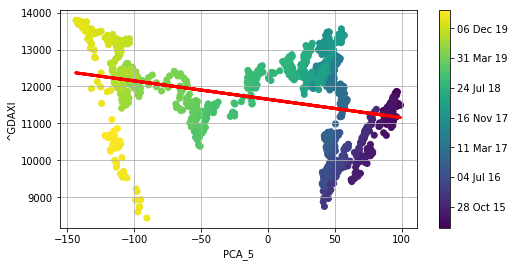

In [136]:
plt.figure(figsize=(8,4))
plt.scatter(dax['PCA_5'], dax['^GDAXI'], c=mpl_dates)
lin_reg = np.polyval(np.polyfit(dax['PCA_5'],
                               dax['^GDAXI'], 1),
                               dax['PCA_5'])
plt.plot(dax['PCA_5'], lin_reg, 'r', lw=3)
plt.grid(True)
plt.xlabel('PCA_5')
plt.ylabel('^GDAXI')
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250),
            format=mpl.dates.DateFormatter('%d %b %y'))

In [137]:
cut_date = '2019/12/1'
early_pca = dax[dax.index < cut_date]['PCA_5']
early_reg = np.polyval(np.polyfit(early_pca,
                               dax['^GDAXI'][dax.index < cut_date], 1),
                               early_pca)

In [138]:
late_pca = dax[dax.index >= cut_date]['PCA_5']
late_reg = np.polyval(np.polyfit(late_pca,
                               dax['^GDAXI'][dax.index >= cut_date], 1),
                               late_pca)

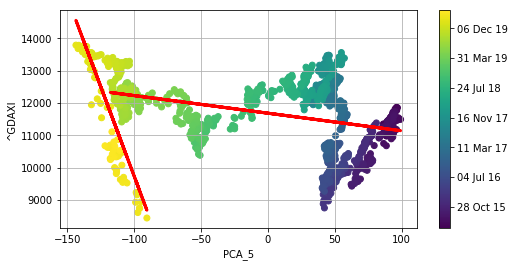

In [139]:
plt.figure(figsize=(8,4))
plt.scatter(dax['PCA_5'], dax['^GDAXI'], c=mpl_dates)
plt.plot(early_pca, early_reg, 'r', lw=3)
plt.plot(late_pca, late_reg, 'r', lw=3)
plt.grid(True)
plt.xlabel('PCA_5')
plt.ylabel('^GDAXI')
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250),
            format=mpl.dates.DateFormatter('%d %b %y'))